<a href="https://colab.research.google.com/github/JYD005/DSN_FREE/blob/main/free.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **import libraries**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#from statsmodels.graphics.gofplots import qqplot
#import scipy

### **read datasets**

In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
ss_df = pd.read_csv('SampleSubmission.csv')

### **perform some EDA**

In [ ]:
train_df.shape

(4990, 13)

In [ ]:
test_df.shape

(3532, 12)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              4990 non-null   object 
 1   Store_ID             4990 non-null   object 
 2   Item_Store_ID        4990 non-null   object 
 3   Item_Weight          4990 non-null   float64
 4   Item_Sugar_Content   4990 non-null   object 
 5   Item_Visibility      4990 non-null   float64
 6   Item_Type            4990 non-null   object 
 7   Item_Price           4990 non-null   float64
 8   Store_Start_Year     4990 non-null   int64  
 9   Store_Size           4990 non-null   object 
 10  Store_Location_Type  4990 non-null   object 
 11  Store_Type           4990 non-null   object 
 12  Item_Store_Returns   4990 non-null   float64
dtypes: float64(4), int64(1), object(8)
memory usage: 506.9+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Item_ID              3532 non-null   object 
 1   Store_ID             3532 non-null   object 
 2   Item_Store_ID        3532 non-null   object 
 3   Item_Weight          3532 non-null   float64
 4   Item_Sugar_Content   3532 non-null   object 
 5   Item_Visibility      3532 non-null   float64
 6   Item_Type            3532 non-null   object 
 7   Item_Price           3532 non-null   float64
 8   Store_Start_Year     3532 non-null   int64  
 9   Store_Size           3532 non-null   object 
 10  Store_Location_Type  3532 non-null   object 
 11  Store_Type           3532 non-null   object 
dtypes: float64(3), int64(1), object(8)
memory usage: 331.3+ KB


In [ ]:
train_df.head()

,Item_ID,Store_ID,Item_Store_ID,Item_Weight,Item_Sugar_Content,Item_Visibility,Item_Type,Item_Price,Store_Start_Year,Store_Size,Store_Location_Type,Store_Type,Item_Store_Returns
4985,NCZ54,BABATUNJI019,NCZ54_BABATUNJI019,12.60,Low Sugar,0.145952,Household,402.39,1992,Small,Cluster 1,Grocery Store,406.14
4986,NCZ54,BABATUNJI027,NCZ54_BABATUNJI027,12.60,Low Sugar,0.082956,Household,410.14,1992,Medium,Cluster 3,Supermarket Type3,13808.69
4987,NCZ54,BABATUNJI045,NCZ54_BABATUNJI045,14.65,Low Sugar,0.083528,Household,406.14,2009,Small,Cluster 2,Supermarket Type1,5685.93
4988,NCZ54,BABATUNJI046,NCZ54_BABATUNJI046,14.65,Low Sugar,0.083359,Household,404.89,2004,Small,Cluster 1,Supermarket Type1,11778.00
4989,NCZ54,BABATUNJI049,NCZ54_BABATUNJI049,14.65,Low Sugar,0.083489,Household,403.39,2006,Medium,Cluster 1,Supermarket Type1,17870.07


In [ ]:
df = train_df.drop_duplicates(subset=['Item_Store_ID'])

In [ ]:
df.shape

(4990, 13)

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,4188.0,12.908838,4.703256,4.555,8.767500,12.600000,17.100000,21.350000
Item_Visibility,4990.0,0.066916,0.053058,0.000,0.027273,0.053564,0.095358,0.328391
Item_Price,4990.0,391.803796,119.378259,78.730,307.890000,393.860000,465.067500,667.220000
Store_Start_Year,4990.0,2004.783567,8.283151,1992.000,1994.000000,2006.000000,2011.000000,2016.000000
Item_Store_Returns,4990.0,6103.520164,4447.333835,83.230,2757.660000,5374.675000,8522.240000,32717.410000


In [ ]:
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,2871.0,12.781665,4.554868,4.555,8.840000,12.600000,16.600000,21.350000
Item_Visibility,3532.0,0.065030,0.049454,0.000,0.026811,0.054444,0.094049,0.321115
Item_Price,3532.0,296.903392,181.897221,78.230,145.307500,237.770000,461.002500,667.220000
Store_Start_Year,3532.0,2004.900057,8.497250,1992.000,1994.000000,2006.000000,2011.000000,2016.000000


In [ ]:
train_df.Item_Sugar_Content.value_counts()

Item_Sugar_Content
Low Sugar          3039
Normal Sugar       1773
Ultra Low Sugar     178
Name: count, dtype: int64

In [ ]:
train_df.Item_Type.value_counts()

Item_Type
Snack Foods              758
Fruits and Vegetables    747
Household                567
Frozen Foods             457
Canned                   376
Dairy                    350
Baking Goods             344
Health and Hygiene       307
Meat                     264
Soft Drinks              261
Breads                   137
Hard Drinks              134
Others                   100
Starchy Foods             81
Breakfast                 66
Seafood                   41
Name: count, dtype: int64

In [ ]:
train_df.Store_Size.value_counts()

Store_Size
Medium    2284
Small     1790
High       916
Name: count, dtype: int64

In [ ]:
test_df.Store_Size.value_counts()

Store_Size
Medium    1686
Small     1314
High       532
Name: count, dtype: int64

In [ ]:
train_df.Store_Location_Type.value_counts()

Store_Location_Type
Cluster 3    1940
Cluster 2    1581
Cluster 1    1469
Name: count, dtype: int64

In [ ]:
train_df.Store_Type.value_counts()

Store_Type
Supermarket Type1    3304
Grocery Store         724
Supermarket Type2     500
Supermarket Type3     462
Name: count, dtype: int64

### **checking for outliers**

In [ ]:
def Box_plots(free):
    plt.figure(figsize=(10, 4))
    plt.title('Box Plot')
    sns.boxplot(free)
    plt.show()

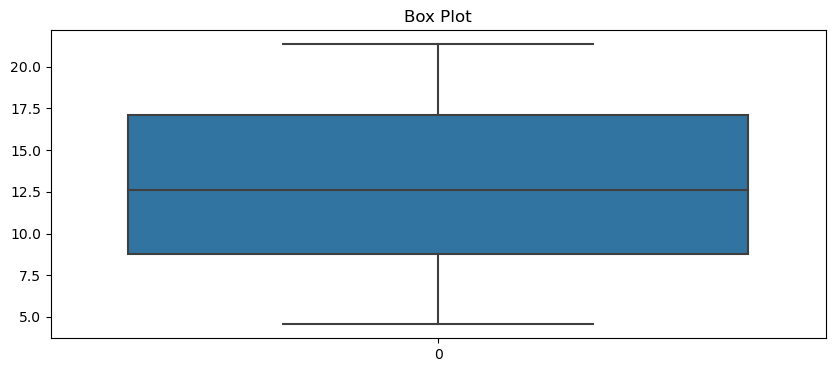

In [ ]:
Box_plots(train_df['Item_Weight'])

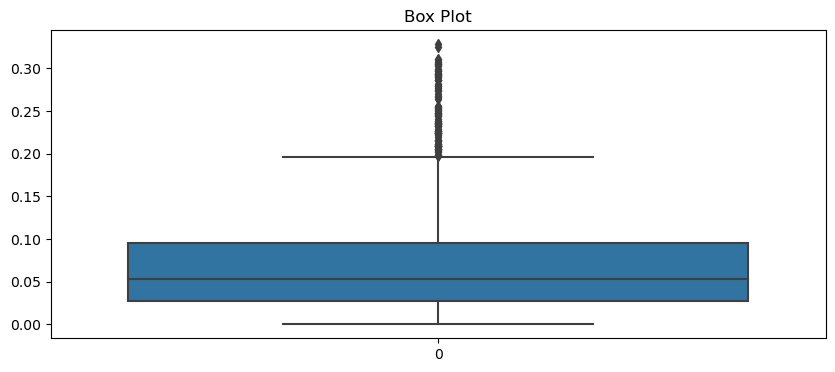

In [ ]:
Box_plots(train_df['Item_Visibility'])

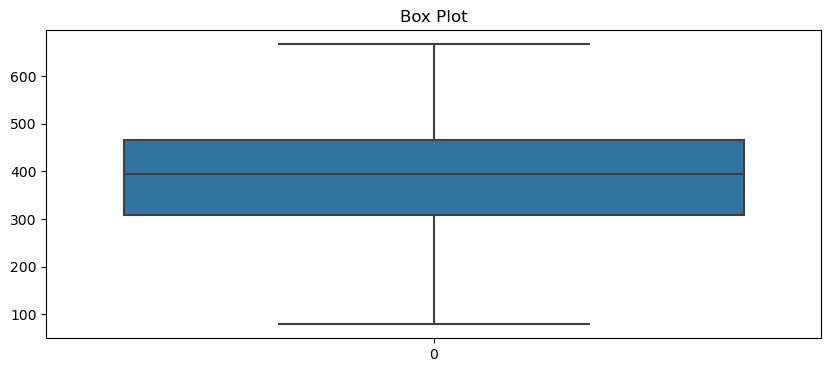

In [ ]:
Box_plots(train_df['Item_Price'])

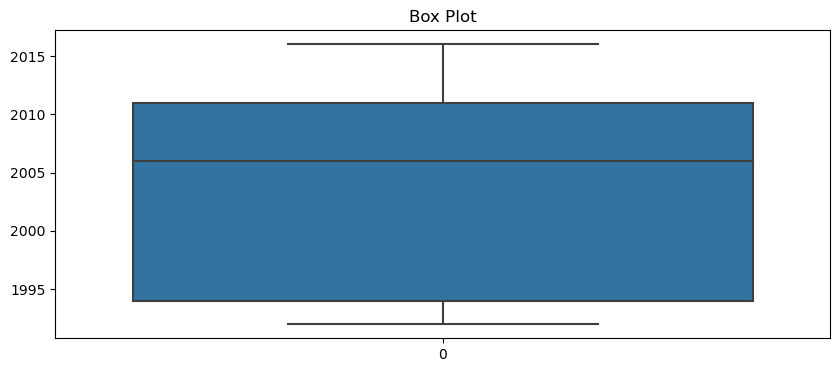

In [ ]:
Box_plots(train_df['Store_Start_Year'])

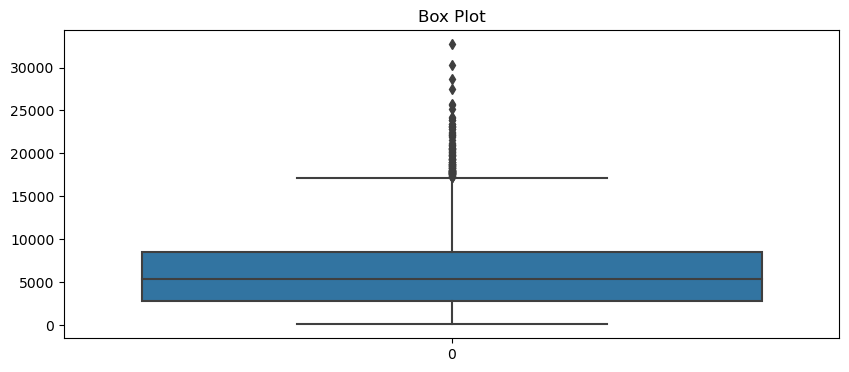

In [ ]:
Box_plots(train_df['Item_Store_Returns'])

### **fill missing values**

In [ ]:
train_df.Item_Weight.median()

12.6

In [ ]:
train_df['Item_Weight'] = train_df.Item_Weight.fillna(train_df.Item_Weight.median())

In [ ]:
test_df['Item_Weight'] = test_df.Item_Weight.fillna(train_df.Item_Weight.median())

In [ ]:
train_df['Store_Size'] = train_df.Store_Size.fillna(method="bfill")

In [ ]:
test_df['Store_Size'] = test_df.Store_Size.fillna(method="bfill")

### **import preprocessing and data modelling packages**

In [ ]:
from sklearn.preprocessing import RobustScaler, QuantileTransformer, PowerTransformer, Normalizer, FunctionTransformer, StandardScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
train_df.columns

Index(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Weight',
       'Item_Sugar_Content', 'Item_Visibility', 'Item_Type', 'Item_Price',
       'Store_Start_Year', 'Store_Size', 'Store_Location_Type', 'Store_Type',
       'Item_Store_Returns'],
      dtype='object')

In [ ]:
X = train_df.drop(['Item_ID', 'Store_ID', 'Item_Store_ID', 'Item_Store_Returns'], axis=1)
y = train_df['Item_Store_Returns']

In [ ]:
X.shape

(4990, 9)

In [ ]:
y.shape

(4990,)

In [ ]:
test_df_1 = test_df.drop(['Item_ID', 'Store_ID', 'Item_Store_ID'], axis=1)

In [ ]:
num_features = ['Item_Weight', 'Item_Visibility', 'Item_Price', 'Store_Start_Year']

In [ ]:
ohe_features = ['Item_Sugar_Content', 'Store_Size', 'Store_Location_Type', 'Store_Type']

In [ ]:
ord_features = ['Item_Type']

In [ ]:
ord_features_1 = ['Item_Sugar_Content', 'Item_Type', 'Store_Size', 'Store_Location_Type', 'Store_Type']

### **create a pipeline for training and testing**

In [ ]:
preprocessor = ColumnTransformer(transformers=[
    ('ord_encode', OrdinalEncoder(), ord_features_1),
    #('ohe_encode', OneHotEncoder(drop='first'), ohe_features),
    ('std_scale', StandardScaler(), num_features),
    ("qt_scale", QuantileTransformer(), num_features),
    ('pt', PowerTransformer(), num_features)],
                                 remainder='passthrough')

### **split data into train and test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### **instantiate model and pipeline**

In [ ]:
linreg = LinearRegression(n_jobs=-1)

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('lr_model', linreg)])

### **fit model**

In [ ]:
pipeline.fit(X_train, y_train)

C:\Users\ACER\anaconda3\Lib\site-packages\numpy\core\_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\ACER\anaconda3\Lib\site-packages\numpy\core\_methods.py:250: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_encode',
                                                  OrdinalEncoder(),
                                                  ['Item_Sugar_Content',
                                                   'Item_Type', 'Store_Size',
                                                   'Store_Location_Type',
                                                   'Store_Type']),
                                                 ('std_scale', StandardScaler(),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_Price',
                                                   'Store_Start_Year']),
                                                 ('qt_scale',
                                                  QuantileTransformer(),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_Price',
                                                   'Store_Start_Year']),
                                                 ('pt', PowerTransformer(),
                                                  ['Item_Weight',
                                                   'Item_Visibility',
                                                   'Item_Price',
                                                   'Store_Start_Year'])])),
                ('lr_model', LinearRegression(n_jobs=-1))])

### **evaluate model**

In [ ]:
y_pred = pipeline.predict(X_test)

print('RMSE: {:.6f}'.format(mean_squared_error(y_test, y_pred, squared=False)))

RMSE: 3104.548633


### **predict test set**

In [ ]:
test_df_pred = pipeline.predict(test_df_1)

### **generate submission**

In [ ]:
ss_df.head()

,Item_Store_ID,Item_Store_Returns
0,DRA59_BABATUNJI010,100
1,DRA59_BABATUNJI013,100
2,DRB01_BABATUNJI013,100
3,DRB13_BABATUNJI010,100
4,DRB13_BABATUNJI013,100


In [ ]:
result = pd.DataFrame({'Item_Store_ID':ss_df.Item_Store_ID, 'Item_Store_Returns':test_df_pred})
result.to_csv("linreg_baseline_model.csv", index=False)